### Useful libraries

In [1]:
import pandas as pd  # table management
import numpy as np  # Matlab-like matrix operations

import plotly  # pretty interactive plots (on website)
import plotly.express as px

import matplotlib.pyplot as plt  # quick plots
import seaborn as sns  # more pretty plots

import sklearn  # machine learning

import logging  # logging info, warnings and errors

from pkg_resources import resource_listdir, resource_stream  # loading raw files

### Useful imports from our package

In [2]:
import coronus_web
from coronus_web.loading.frames import get_cases  # for loading preprocessed cases (already preprocessed)
from coronus_web.plotting.plots import plot_interactive_df  # for plotting a dataframe
from coronus_web.loading.download import get_frames
from coronus_web.loading.download import GEO_LEVELS, CASE_TYPES  # constants

### Or get our preprocessed cases

In [395]:
geo_level = "country"
total = get_cases(geo_level, "total") + 0.1
active = get_cases(geo_level, "active") + 0.1
deaths = get_cases(geo_level, "deaths") + 0.1
recovered = get_cases(geo_level, "recovered") + 0.1

In [396]:
# active = active.resample("D").interpolate(method="time")
active = active.rolling(5).mean().fillna(method="ffill")

In [397]:
active

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-25,50.3,97.5,159.3,135.5,2.7,2.3,272.1,213.7,1647.5,4318.7,...,82.7,172.9,6624.1,156.3,48.5,66.5,104.1,38.5,4.7,2.5
2020-03-26,63.3,113.3,203.5,162.1,3.1,3.5,327.9,236.1,1964.9,5108.9,...,112.1,206.1,7887.3,177.7,54.9,70.9,115.3,45.5,7.5,2.3
2020-03-27,76.5,125.7,250.5,192.5,3.5,4.7,376.9,257.7,2261.3,5872.3,...,158.3,253.7,9574.7,193.7,62.7,74.9,124.7,53.1,11.3,2.5


In [579]:
smooth = 10
features = pd.concat(
    [
#         np.log(active).stack().rename("log_active"),
#         np.log(total).stack().rename("log_total"),
        (np.log(total) - np.log(active)).stack().rename("log_total_active"),
        np.log(active).diff(1).stack().rename("log_growth"),
        np.log(active).diff(3).stack().rename("log_growth_3d"),
        np.log(active).diff(7).stack().rename("log_growth_7d"),
        np.log(active).diff(1).shift(3).stack().rename("log_growth_3d_ago"),
#         np.log(deaths).stack().rename("log_deaths"),
#         (np.log(recovered) - np.log(deaths)).stack().rename("log_recovered_deaths")
    ],
    axis=1
)
features = features.sort_index()
# features_scaled = features.replace([-np.inf, np.inf], np.nan).fillna(method="backfill")
features_scaled = features
features_scaled = features_scaled.dropna()
features_scaled

log_total_active  log_growth  log_growth_3d  \
date       country                                                           
2020-02-02 China                       0.504488    0.235355       0.752653   
           Japan                       0.383324    0.210451       0.876930   
           Korea, South                0.484680    0.269920       0.869038   
           Taiwan*                     0.061244    0.043017       0.319770   
           Thailand                    0.456483    0.086260       0.426343   
...                                         ...         ...            ...   
2020-03-29 Uzbekistan                  0.471810    0.209609       0.493185   
           Venezuela                   0.399188    0.022786       0.119505   
           Vietnam                     0.272033    0.066355       0.217403   
           West Bank and Gaza          0.442342    0.147279       0.432210   
           Zambia                      0.302685    0.276888       1.053150   

                               log_growth_7d  log_growth_3d_ago  
date       country                                               
2020-02-02 China                    2.257651           0.321892  
           Japan                    1.784487           0.329479  
           Korea, South             1.588161           0.108214  
           Taiwan*                  1.335001           0.191055  
           Thailand                 0.945643           0.051960  
...                                      ...                ...  
2020-03-29 Uzbekistan               1.048710           0.123950  
           Venezuela                0.486917           0.064068  
           Vietnam                  0.643460           0.102185  
           West Bank and Gaza       0.658105           0.167054  
           Zambia                   2.235144           0.467341  

[2994 rows x 5 columns]

In [580]:
features_scaled = (features_scaled - features_scaled.mean())/features_scaled.std()

In [581]:
# fig = px.scatter_matrix(
#     features.sample(100).reset_index(),
#     dimensions=features.columns,
#     color=geo_level,
# )
# fig.show()

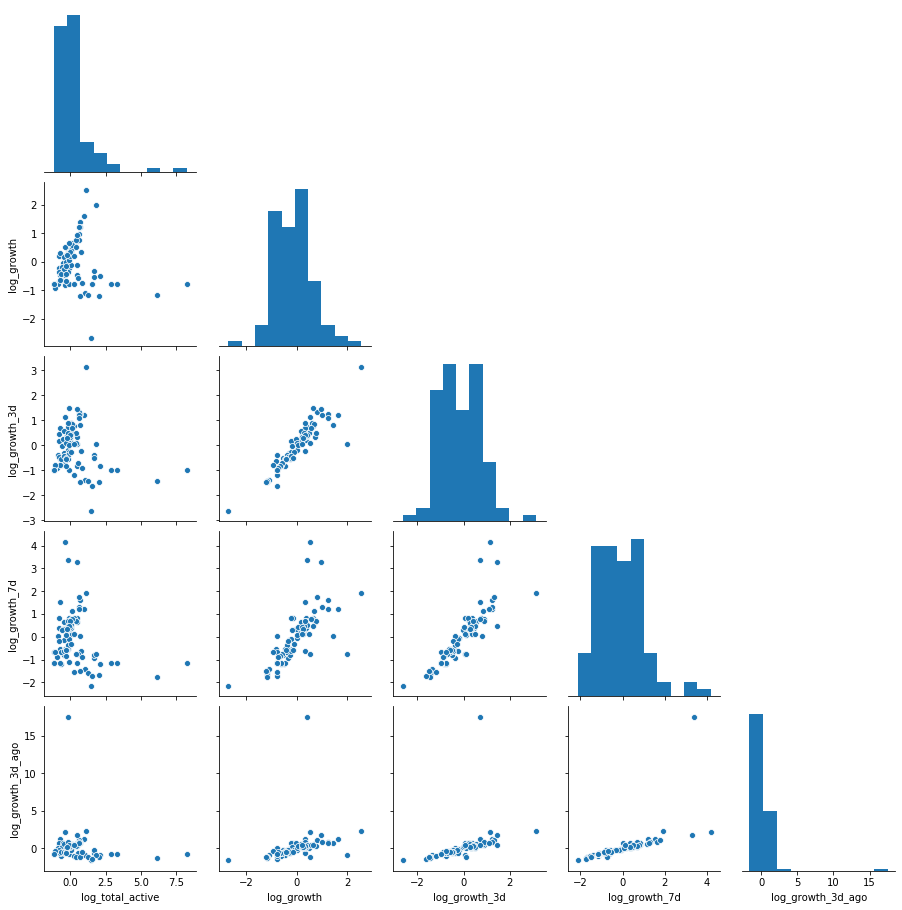

In [582]:
sns.pairplot(
    features_scaled.sample(100).reset_index(),
    vars=features.columns,
#     hue=geo_level,
#     diag_kind="kde",
#     kind="reg",
    corner=True
)

# Split data into train and test

In [583]:
train = features_scaled.loc[:"2020-02-28"]
test = features_scaled.loc["2020-03-01":"2020-03-20"]

## Encoding

- PCA

In [584]:
from sklearn.decomposition import PCA

In [585]:
encoder = PCA(n_components=2, whiten=True)

In [586]:
encoder.fit(train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [587]:
encoder.explained_variance_ratio_

array([0.52484936, 0.36899794])

In [588]:
# train_encoding = pd.DataFrame(encoder.transform(train), index=train.index)
# test_encoding = pd.DataFrame(encoder.transform(test), index=test.index)

train_encoding = train
test_encoding = test

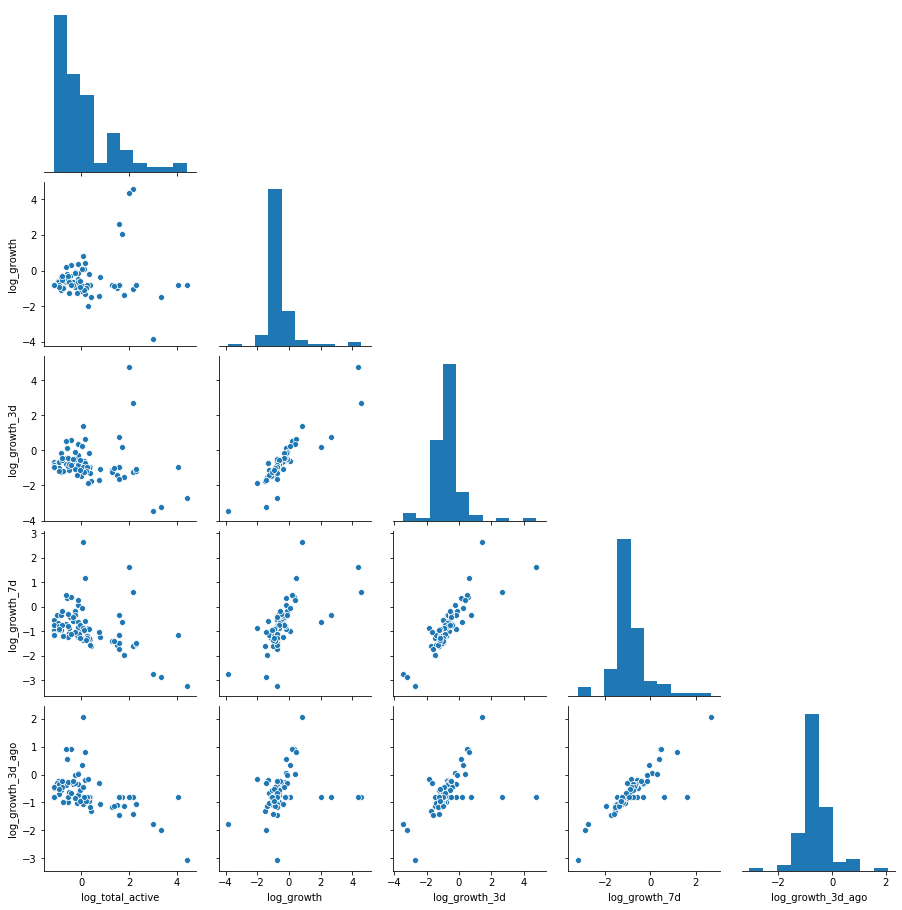

In [589]:
sample = train_encoding.sample(100)
sns.pairplot(
    sample.reset_index(),
    vars=sample.columns,
#     hue=geo_level,
    corner=True
)

In [590]:
from sklearn.neighbors import NearestNeighbors

In [591]:
nn = NearestNeighbors(n_neighbors=5)
nn.fit(train_encoding)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [592]:
guy = test_encoding.sample(1)
ds, neighs = nn.kneighbors(np.atleast_2d(guy.values))
test.loc[guy.index]

,,log_total_active,log_growth,log_growth_3d,log_growth_7d,log_growth_3d_ago
date,country,,,,,
2020-03-18,Georgia,-0.781982,-0.390455,-0.564071,-0.294205,-0.098854


In [593]:
ds.flatten().tolist()

[0.1345528997782088,
 0.25285700345728535,
 0.25733174090103467,
 0.26669670547089225,
 0.29968857598142057]

In [594]:
neighs.flatten().tolist()

[87, 35, 53, 434, 120]

In [595]:
histories = train.iloc[neighs.flatten().tolist()].index.to_frame().reset_index(drop=True)
histories["date_end"] = histories["date"] + pd.DateOffset(14)
histories

,date,country,date_end
0,2020-02-09,"Korea, South",2020-02-23
1,2020-02-06,Canada,2020-02-20
2,2020-02-07,Japan,2020-02-21
3,2020-02-23,Diamond Princess,2020-03-08
4,2020-02-11,China,2020-02-25


In [596]:
# sections = []
# for i, (date_start, region, date_end) in histories.iterrows():
#     a = features.loc[(slice(date_start, date_end), region), "log_growth"].rename(str(date_start.date()) + "-" + region)
#     sections.append(a)

In [597]:
sections = [
    features.loc[(slice(date_start, date_end), region), "log_growth"]
    .rename(str(date_start.date()) + "-" + region)
    .reset_index(drop=True)
    for i, (date_start, region, date_end) in histories.iterrows()
]

In [598]:
sims = pd.concat(sections, axis=1)
sims["prediction"] = sims.mean(axis=1)

In [599]:
true_range = guy.index.to_frame().reset_index(drop=True)
true_range["date_end"] = true_range["date"] + pd.DateOffset(14)
date_start, region, date_end = true_range.iloc[0].values
sims["truth"] = features.loc[(slice(date_start, date_end), region), "log_growth"].reset_index(drop=True)

In [600]:
# plot_interactive_df(sims).show()
np.exp((sims).cumsum())

,"2020-02-09-Korea, South",2020-02-06-Canada,2020-02-07-Japan,2020-02-23-Diamond Princess,2020-02-11-China,prediction,truth
0,1.057416,1.046512,1.049261,1.047783,1.061059,1.052390,1.078176
1,1.105263,1.186047,1.098522,1.070038,1.104127,1.112138,1.136808
2,1.124402,1.325581,1.137931,1.088693,1.217676,1.175916,1.195440
3,1.105263,1.465116,1.147783,1.108329,1.344800,1.226041,1.299674
4,1.086124,1.558140,1.108374,1.127966,1.465151,1.253921,1.416938
5,1.076555,1.651163,1.059113,1.128293,1.581453,1.274234,1.553746
6,1.028708,1.604651,1.000000,1.128621,1.698920,1.259154,1.697068
7,0.980861,1.558140,0.940887,1.128948,1.733130,1.229847,1.846906
8,0.971292,1.511628,1.019704,1.128293,1.731213,1.239391,1.977199
9,0.952153,1.465116,1.305419,1.127966,1.715427,1.286469,2.094463


In [601]:
plot_interactive_df(sims[["prediction", "truth"]])

In [602]:
np.exp(features.loc[guy.index])

,,log_total_active,log_growth,log_growth_3d,log_growth_7d,log_growth_3d_ago
date,country,,,,,
2020-03-18,Georgia,1.151057,1.078176,1.212454,2.314685,1.151899
